# `Shapely`: Manipulation & analysis of geometric objects

### Roadmap
1. [x] Introduction
2. [x] Basic Geometry types
3. [x] Geometric Object Properties 
4. [x] Coordinate systems
5. [x] Spatial relationships between Geometries
6. [x] Affine transofmrations
7. [x] Simplifying & Buffering Geometries
8. [x] Practical examples & use cases
9. [x] Additional resources & further reading

Let's start by importing the necessary libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Introduction

- Shapely is a Python library for the manipulation and analysis of geometric objects. 
- It is based on the widely used [GEOS](https://libgeos.org/), which provides essential support for geographic information systems operations, such as **spatial relationships**, **geometric operations**, and **coordinate transformations**.
-  Shapely is designed for use in conjunction with other Python libraries for geospatial analysis, such as `GeoPandas` and `Rasterio`. 
- It provides a convenient and efficient way to work with geometric objects like **points**, **lines**, and **polygons**, making it an essential tool for many geospatial analysis tasks.

### Installation

- Shapely can be installed using either pip or conda. To install Shapely using pip, open a terminal or command prompt and run:

```bash 
pip install shapely

# Or using Conda...
mamba install -c conda-forge shapely --yes
```

## Basic Geometric Types

- `Shapely` provides several basic geometric objects that are commonly used in geospatial analysis. These objects are:
    - `Point`: Represents a single point in 2-3 D space.
    - `LineString`: Represents a sequence of connected points forming a line.
    - `Polygon`: Represents a filled area defined by a sequence of points that form a closed ring.

In this section, we will demonstrate how to create these objects using Shapely.

### `Point`

- A `Point` object represents a single point in a two-dimensional Cartesian coordinate system. 
- **Points are typically used to represent locations, such as the coordinates of a city or a landmark**.

To create a point, you can use the `Point` constructor from the `shapely.geometry` module and provide the `x` and `y` coordinates as arguments.

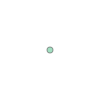

In [3]:
from shapely.geometry import Point

# Create a point
point = Point(1,2)
point

### `LineString`

- A `LineString` object represents a sequence of connected points forming a line. 
- **`LineString`s are used to represent linear features, such as roads or rivers**.

To create a `LineString`, you can use the LineString constructor from the `shapely.geometry` module and provide a list of coordinate tuples (`x`, `y`) as arguments.

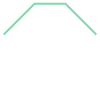

In [4]:
from shapely.geometry import LineString

points = [(0,0), (1,1), (2,1), (3,0)]
linestring = LineString(points)
linestring

### `Polygon`

- A `Polygon` object represents a filled area defined by a sequence of points that **form a closed ring**. 
- Polygons are used to represent areas, such as **countries**, **states**, or land parcels.

To create a `Polygon`, you can use the `Polygon` constructor from the `shapely.geometry` module and provide a list of coordinate tuples (`x`, `y`) as arguments. The first and last coordinate tuples should be the same to close the ring.

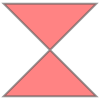

In [7]:
from shapely.geometry import Polygon

points = [(0,0), (2,2), (0,2), (2,0), (0,0)]
polygon = Polygon(points)
polygon

In [8]:
polygon.is_valid

False

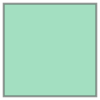

In [9]:
# Fix the ordering
points = [(0,0), (0,2), (2,2), (2,0), (0,0)]
polygon = Polygon(points)
polygon

In [10]:
polygon.is_valid

True

### Multi Geometries

- You may have **multiple geometric objects of the same type** that you want to represent as a single entity. `Shapely` provides the following classes for handling such cases:
    - `MultiPoint`: Represents a collection of points.
    - `MultiLineString`: Represents a collection of linestrings.
    - `MultiPolygon`: Represents a collection of polygons.

These classes can be created using their respective constructors from the `shapely.geometry` module, by providing a list of the corresponding geometric objects as arguments.

In [11]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

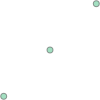

In [12]:
points = [Point(0, 0), Point(1, 1), Point(2, 2)]
multipoint = MultiPoint(points)
multipoint

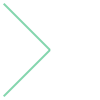

In [13]:
linestrings = [LineString([(0, 0), (1, 1)]), LineString([(1, 1), (0, 2)])]
multiline = MultiLineString(linestrings)
multiline

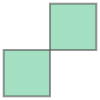

In [14]:
polygons = [Polygon([(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]), Polygon([(1, 1), (1, 2), (2, 2), (2, 1), (1, 1)])]
multipolygon = MultiPolygon(polygons)
multipolygon

## Object Properties

- Shapely provides various **attributes** and **methods** that allow you to extract information from and perform operations on geometric objects. 
- In this section, we will cover some of the most commonly used properties and methods, such as `area`, `length`, `bounds`, `centroid`, and `is_valid`.

### Properties of Geometric Objects

- `area`: Returns the area of a `Polygon` or `MultiPolygon` object.
- `length`: Returns the length of a `LineString`, `MultiLineString`, or the perimeter of a `Polygon` or `MultiPolygon` object.
- `bounds`: Returns the bounding box of a geometric object as a tuple `(min_x, min_y, max_x, max_y)`.
- `centroid`: Returns the geometric centroid of a geometric object as a `Point`.
- `is_valid`: Returns a boolean value indicating whether the geometry is topologically valid.

In [15]:
# Area of a Polygon
polygon_area = polygon.area
polygon_area

4.0

In [16]:
# Check if points have areas
multipoint.area

0.0

In [17]:
# Length of a LineString
linestring_length = linestring.length
linestring_length

3.82842712474619

In [18]:
# Check if points have a length
multipoint.length

0.0

In [23]:
# Bounds of a Point
point_bounds = point.bounds
print(f"Point bounds: {point_bounds}")
print(f"Point coordinates: {point.x, point.y}")

Point bounds: (1.0, 2.0, 1.0, 2.0)
Point coordinates: (1.0, 2.0)


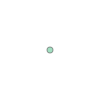

In [24]:
# Centroid of a Polygon
polygon_centroid = polygon.centroid
polygon_centroid

In [25]:
# Validity of a Geometry
is_polygon_valid = polygon.is_valid
is_polygon_valid

True

### Basic Geometric Operations

- Shapely provides several methods to perform basic geometric operations on objects:
    - `union`: Computes the geometric union of two objects.
    - `intersection`: Computes the geometric intersection of two objects.
    - `difference`: Computes the geometric difference of two objects.
    - `symmetric_difference`: Computes the symmetric difference of two objects (union without the intersection).

In [26]:
# Create two polygon objects
polygon1 = Polygon([(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)])
polygon2 = Polygon([(1, 1), (1, 3), (3, 3), (3, 1), (1, 1)])

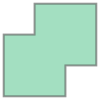

In [30]:
# Union of two polygons
polygon_union = polygon1.union(polygon2)
polygon_union

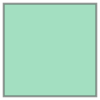

In [32]:
# Intersection of two polygons
polygon_intersection = polygon1.intersection(polygon2)
polygon_intersection

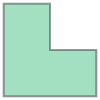

In [39]:
# Difference of two polygons
polygon_difference = polygon1.difference(polygon2)
polygon_difference

In [40]:
# How about if we differ a polygon from itself?
polygon_diff = polygon1.difference(polygon1)
print(f"Diff bounds: {polygon_diff.bounds}")
print(f"Diff area: {polygon_diff.area}")

Diff bounds: (nan, nan, nan, nan)
Diff area: 0.0


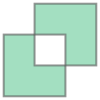

In [41]:
# Symmetric difference of two polygons
polygon_symmetric_difference = polygon1.symmetric_difference(polygon2)
polygon_symmetric_difference

## Coordinate Systems and Transformations

### Coordinate Systems

- **A coordinate system is a way to represent the position of points in space using numerical values**. 
- In geospatial analysis, coordinate systems are crucial for accurately representing and analyzing geographic data. 
- There are two main types of coordinate systems used in geospatial analysis:
    - `Geographic Coordinate Systems`: These systems use latitude and longitude values to describe the location of a point on the Earth's surface. 
        - The most common geographic coordinate system is the World Geodetic System 1984 (WGS 84), which is used by GPS.
    - `Projected Coordinate Systems (PCS)`: These systems project the Earth's surface onto a flat plane, using linear units like meters or feet. 
        - Projected coordinate systems are designed to **minimize distortion in specific regions or for specific purposes, such as distance and area measurements**.
        - The Universal Transverse Mercator (UTM) and State Plane Coordinate System (SPCS) are examples of widely used projected coordinate systems.

When working with geospatial data, it's essential to be aware of the coordinate system being used and to perform necessary transformations when combining data from different coordinate systems.

### Coordinate Transformations with `Shapely` and `Pyproj`

- `Shapely` itself does not provide built-in support for coordinate transformations. However, it can be used in conjunction with other libraries, such as `Pyproj`, to perform these transformations.
- `Pyproj` is a Python library that provides access to the [PROJ](https://github.com/OSGeo/PROJ) coordinate transformation software. 
    - **It allows you to convert coordinates between different coordinate systems and perform various geodetic calculations**.

In this section, we will demonstrate how to use Shapely and Pyproj together to perform a simple coordinate transformation.

In [42]:
from pyproj import Transformer
from shapely.ops import transform

In [43]:
# Define the input and output coordinate systems (EPSG codes)
input_crs = "EPSG:4326"  # WGS 84 (latitude, longitude)
output_crs = "EPSG:32633"  # UTM Zone 33N (meters)

In [44]:
# Create a Pyproj transformer object for the coordinate transformation
transformer = Transformer.from_crs(input_crs, output_crs)

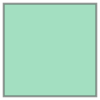

In [45]:
# Define a Shapely geometry (polygon) in the input coordinate system (WGS 84)
polygon_wgs84 = Polygon([
    (12.482, 41.890),
    (12.482, 41.900),
    (12.492, 41.900),
    (12.492, 41.890),
    (12.482, 41.890)
])
polygon_wgs84

In [49]:
# Perform the coordinate transformation using Shapely and Pyproj
polygon_utm33n = transform(transformer.transform, polygon_wgs84)

# Check the bounds of the transformed polygon (in meters)
polygon_utm33n.bounds

(3524400.4453320177, 1542215.3645575552, 3525739.918396491, 1543573.8093588573)

In [50]:
# Because we have transformed the polygon coordinates, we can... 
# ..Calculate the area in square kilometers
area_km2 = polygon_utm33n.area / 1e6
area_km2

1.4950316391590341

## Spatial Relationships and Predicates

- Spatial relationships describe **how geometric objects relate to one another in space**. 
- Understanding these relationships is essential for many geospatial analysis tasks. 
- `Shapely` provides several methods, known as `predicates`, to test the spatial relationships between objects. Some of the most commonly used predicates are:
    - `equals`: Tests whether two geometric objects are geometrically equal (i.e., have the same coordinates).
    - **`contains`**: Tests whether one geometric object contains another (i.e., the interior of the first object completely contains the second object).
    - `crosses`: Tests whether one geometric object crosses another (i.e., the two objects intersect, but not at all points).
    - `disjoint`: Tests whether two geometric objects are disjoint (i.e., they do not intersect).
    - **`intersects`**: Tests whether two geometric objects intersect (i.e., they share at least one point in common).
    - `overlaps`: Tests whether two geometric objects overlap (i.e., their interiors intersect, but neither contains the other).
    - `touches`: Tests whether two geometric objects touch (i.e., they share points only on their boundaries).
    - **`within`**: Tests whether one geometric object is within another (i.e., the interior of the first object is completely contained by the second object).

In this section, we will demonstrate how to use these predicates in `Shapely`.

In [53]:
# A bunch of points
point1 = Point(0, 0)
point2 = Point(0, 0)
point3 = Point(1, 1)

# One linestring (connected points)
linestring = LineString([(0, 0), (1, 1), (2, 2)])

# Two polygons
polygon1 = Polygon([(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)])
polygon2 = Polygon([(1, 1), (1, 3), (3, 3), (3, 1), (1, 1)])

# Spatial relationship predicates
print("point1 equals point2:", point1.equals(point2))
print("point1 within polygon1:", point1.within(polygon1))
print("linestring crosses polygon1:", linestring.crosses(polygon1))
print("polygon1 disjoint polygon2:", polygon1.disjoint(polygon2))
print("polygon1 intersects polygon2:", polygon1.intersects(polygon2))
print("polygon1 overlaps polygon2:", polygon1.overlaps(polygon2))
print("polygon1 touches polygon2:", polygon1.touches(polygon2))

point1 equals point2: True
point1 within polygon1: False
linestring crosses polygon1: False
polygon1 disjoint polygon2: False
polygon1 intersects polygon2: True
polygon1 overlaps polygon2: True
polygon1 touches polygon2: False


These examples demonstrate how to use Shapely's predicates to test spatial relationships between geometric objects. Note that some of these predicates are closely related, such as `contains` and `within`, which are the inverse of each other.

## Affine Transformations

- Affine transformations are geometric transformations that preserve:
    - Collinearity: points lying on a straight line remain on a straight line after transformation
    - Relative ratios of distances: midpoints remain midpoints. 
- Common affine transformations include:
    - `Scaling`: Changes the size of an object by a specified factor in the `x`, `y`, and/or `z` directions. 
        - The scaling can be uniform (same factor in all directions) or non-uniform (different factors for each direction).
    - `Rotation`: Rotates an object around a specified point by a given angle (in degrees). 
        - The rotation can be performed in two dimensions (around a point) or three dimensions (around an axis).
    - `Translation`: Moves an object by a given distance along the `x`, `y`, and/or `z` directions without changing its size or orientation.

In this section, we will demonstrate how to perform affine transformations on Shapely geometries using the `shapely.affinity` module.

In [54]:
from shapely import affinity

In [55]:
# Create a point and a Linestring that contains the point
point = Point(1, 1)
linestring = LineString([(0, 0), (1, 1), (2, 2)])
print(f"Point coordinates: {point.x}, {point.y}")
print(f"Line coordinates: {list(linestring.coords)}")

Point coordinates: 1.0, 1.0
Line coordinates: [(0.0, 0.0), (1.0, 1.0), (2.0, 2.0)]


In [57]:
# Scaling
scaled_point = affinity.scale(point, xfact=2, yfact=2)
scaled_linestring = affinity.scale(linestring, xfact=2, yfact=2)

print(f"Scaled point coordinates: {scaled_point.x}, {scaled_point.y}")
print(f"Scaled line coordinates: {list(scaled_linestring.coords)}")

Scaled point coordinates: 1.0, 1.0
Scaled line coordinates: [(-1.0, -1.0), (1.0, 1.0), (3.0, 3.0)]


In [58]:
# Rotation
rotated_point = affinity.rotate(point, angle=45, origin=(0, 0))
rotated_linestring = affinity.rotate(linestring, angle=45, origin=(0, 0))

print(f"Rotated point coordinates: {rotated_point.x}, {rotated_point.y}")
print(f"Rotated line coordinates: {list(rotated_linestring.coords)}")

Rotated point coordinates: 1.1102230246251565e-16, 1.414213562373095
Rotated line coordinates: [(0.0, 0.0), (1.1102230246251565e-16, 1.414213562373095), (2.220446049250313e-16, 2.82842712474619)]


In [59]:
# Translation
translated_point = affinity.translate(point, xoff=1, yoff=1)
translated_linestring = affinity.translate(linestring, xoff=1, yoff=1)

print(f"Translated point coordinates: {translated_point.x}, {translated_point.y}")
print(f"Translated line coordinates: {list(translated_linestring.coords)}")

Translated point coordinates: 2.0, 2.0
Translated line coordinates: [(1.0, 1.0), (2.0, 2.0), (3.0, 3.0)]


- In these examples, we performed scaling, rotation, and translation on a `Point` and a `LineString` using the `shapely.affinity` module. 
- Note: for each transformation, we specified the necessary parameters, such as scaling factors, rotation angle, translation distances, and the origin of the transformation (when applicable).

## Simplifying and Buffering Geometries

### Simplifying Geometries

- Simplifying geometries is a process of **reducing the number of vertices in a geometry while maintaining its overall shape**. 
- This can be useful for reducing the complexity and size of geospatial data, making it more manageable for analysis and visualization purposes.

Shapely provides the `simplify()` method to simplify geometries using the Douglas-Peucker algorithm.

### Buffering Geometries

- Buffering is the process of creating a new geometry that represents an area at a specified distance around an existing geometry. 
    - This can be useful for tasks such as **proximity analysis**, where you need to identify features within a certain distance of other features.
- In Shapely, you can create buffers around geometries using the `buffer()` method.

Let's write some code for both `simplify()` and `buffer()`:

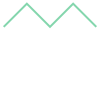

In [60]:
# Original geometry
linestring = LineString([(0, 0), (1, 1), (2, 0), (3, 1), (4, 0)])
linestring

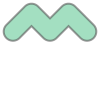

In [62]:
# Buffer the original geometry
buffer_distance = 0.5
buffered_linestring = linestring.buffer(buffer_distance)
buffered_linestring

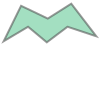

In [70]:
# Simplify the buffer geometry
tolerance = .5
simplified_linestring = buffered_linestring.simplify(tolerance)
simplified_linestring

## Examples

- In this section, we will explore a few examples that apply the concepts and techniques covered in this notebook. 
- These examples will demonstrate how Shapely can be used for various geospatial analysis tasks.

### Example 1: Point-in-Polygon Analysis

Suppose we have a dataset of points representing the locations of schools in a city and a dataset of polygons representing different administrative zones. We want to determine which schools are located within each administrative zone.

#### Step 1: Create Shapely geometries for schools and administrative zones

In this example, we will create a few sample geometries for demonstration purposes. In practice, you would typically read the data from a file (e.g., using GeoPandas).

In [81]:
# Create sample school geometries (points)
school1 = Point(1, 1)
school2 = Point(3, 3)
school3 = Point(5, 5)

# Create sample administrative zone geometries (polygons)
zone1 = Polygon([(0, 0), (0, 4), (4, 4), (4, 0), (0, 0)])
zone2 = Polygon([(4, 0), (4, 4), (8, 4), (8, 0), (4, 0)])

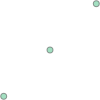

In [82]:
# Visualize the points
MultiPoint([school1, school2, school3])

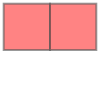

In [83]:
# Visualize the zones
MultiPolygon([zone1, zone2])

#### Step 2: Perform the point-in-polygon analysis

Now that we have the school and administrative zone geometries, we can use Shapely's within predicate to determine which schools are located within each zone.

In [84]:
# Check if each school is within a zone
school1_in_zone1 = school1.within(zone1)
school1_in_zone2 = school1.within(zone2)

school2_in_zone1 = school2.within(zone1)
school2_in_zone2 = school2.within(zone2)

school3_in_zone1 = school3.within(zone1)
school3_in_zone2 = school3.within(zone2)

school1_in_zone1, school1_in_zone2, school2_in_zone1, school2_in_zone2, school3_in_zone1, school3_in_zone2

(True, False, True, False, False, False)

### Example 2: Buffer Analysis for Proximity

- Suppose we have a dataset of points representing the locations of parks in a city. 
- We want to create a 500-meter buffer around each park and then determine if a given location is within walking distance to any park (i.e., within the buffer).

#### Step 1: Create Shapely geometries for parks and the location

In this example, we will create a few sample park geometries and a location geometry for demonstration purposes. In practice, you would typically read the data from a file (e.g., using GeoPandas).

In [111]:
# Create sample park geometries (points)
park1 = Point(2.98, 2.98)
park2 = Point(3.1, 3.1)

# Create the location geometry (point)
location = Point(3, 3)

#### Step 2: Create buffers around the parks

We will create 500-meter buffers around each park using the buffer() method. Note that in this example, we assume that the coordinates are in a geographic coordinate system (e.g., WGS 84), so we will need to convert the buffer distance to decimal degrees. 

In practice, it is usually better to work with a projected coordinate system for such analysis.

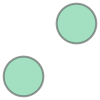

In [112]:
# Buffer distance in meters
buffer_distance_meters = 5_000

# Approximate conversion factor from meters to decimal degrees (assuming coordinates are in WGS 84)
meters_to_degrees = 1 / 111139

# Calculate buffer distance in decimal degrees
buffer_distance_degrees = buffer_distance_meters * meters_to_degrees

# Create buffers around the parks
park1_buffer = park1.buffer(buffer_distance_degrees)
park2_buffer = park2.buffer(buffer_distance_degrees)
MultiPolygon([park1_buffer, park2_buffer])

#### Step 3: Determine if the location is within walking distance to any park

Now that we have the park buffers, we can use Shapely's within predicate to determine if the location is within walking distance to any park (i.e., within the buffer).

In [113]:
# Check if the location is within walking distance to any park
location_within_park1_buffer = location.within(park1_buffer)
location_within_park2_buffer = location.within(park2_buffer)
location_within_park1_buffer, location_within_park2_buffer

(True, False)

These practical examples demonstrate how Shapely can be used for various geospatial analysis tasks, such as point-in-polygon analysis and buffer analysis for proximity. By combining Shapely with other geospatial libraries (e.g., GeoPandas, Pyproj, and Rasterio), you can perform a wide range of geospatial operations in Python.

## Additional Resources and Further Reading

To deepen your understanding of Shapely and learn more about geospatial analysis in Python, we recommend exploring the following resources:

- [Shapely Documentation](https://shapely.readthedocs.io/en/stable/manual.html): The official documentation provides comprehensive information on Shapely's functionalities, methods, and classes. It is a great reference for understanding the library in-depth.
- [GeoPandas Documentation](https://geopandas.org/en/stable/): GeoPandas extends the capabilities of Shapely for managing and analyzing geospatial data in a more convenient and powerful way. GeoPandas is built on top of Shapely and Pandas, and it provides a high-level interface for working with geospatial data in Python.
- [Automating GIS-processes Course](https://autogis-site.readthedocs.io/en/latest/): A comprehensive open-source course that covers various aspects of geospatial analysis using Python, including Shapely, GeoPandas, and other geospatial libraries.
- [Geospatial Data with Python](https://macwright.com/2012/10/31/gis-with-python-shapely-fiona.html): Shapely and Fiona: A tutorial that introduces Shapely and Fiona, focusing on working with vector data in Python.
- [CRS Catalog](https://epsg.io/): lookup suitable CRS codes by location or locations by CRS codes.

These resources will help you gain a deeper understanding of Shapely and geospatial analysis in Python, as well as provide practical examples and use cases to work through. Happy learning!

---